In [1]:
import pandas as pd
from sklearn.utils import shuffle

df = pd.read_csv("Dataset/bladder+normal.csv")
df = shuffle(df, random_state=42).reset_index(drop=True)

df.head(5)

,cancer_type,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,normal,normal,10.154073,6.229753,4.726761,7.694610,3.036633,7.709174,4.876000,5.498816,...,12.301864,11.774613,13.769954,13.445276,8.039906,7.075380,7.236685,3.213733,3.253917,3.309950
1,bladder,tumoral_urothelia,5.448550,2.855473,3.956391,6.990753,2.515888,4.532908,5.148095,3.420617,...,12.355006,12.073772,13.375017,13.129036,14.285014,12.222636,13.764253,2.635243,3.087296,2.749863
2,normal,normal,11.113545,5.940342,5.564016,8.278557,3.737454,8.904443,6.310405,5.029888,...,12.440360,11.836593,13.794074,13.652361,10.184499,5.065497,7.553789,3.308568,3.670986,3.624235
3,bladder,tumoral_urothelia,6.117643,2.963498,4.462724,7.637291,2.748184,4.799081,5.387159,3.796579,...,13.488239,13.297656,14.433989,14.138876,8.479708,3.234453,3.255350,2.217603,2.700261,2.564158
4,bladder,tumoral_urothelia,6.341556,2.839390,4.035876,6.989258,2.344312,5.291725,5.210843,3.260132,...,12.746157,12.766855,14.151366,13.834423,8.481049,3.886499,3.866914,2.422337,2.591235,2.733775


In [2]:
def preprocessing(df):
    
    # Drop type Columns
    if "type" in df.columns:
        df = df.drop(columns="type")

    # Convert label to binary type:
    if 'cancer_type' in df.columns and not df['cancer_type'].isin([0, 1]).all():
        df['cancer_type'] = df['cancer_type'].map({'bladder': 1, 'normal': 0})
    
    # Get X,y
    target = 'cancer_type'
    X = df.drop(columns=target)
    y = df[target]
    
    return X,y 

X,y = preprocessing(df)
display(X.head(5))
display(y.head(5))

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,10.154073,6.229753,4.726761,7.694610,3.036633,7.709174,4.876000,5.498816,7.182190,3.183595,...,12.301864,11.774613,13.769954,13.445276,8.039906,7.075380,7.236685,3.213733,3.253917,3.309950
1,5.448550,2.855473,3.956391,6.990753,2.515888,4.532908,5.148095,3.420617,3.378807,3.022539,...,12.355006,12.073772,13.375017,13.129036,14.285014,12.222636,13.764253,2.635243,3.087296,2.749863
2,11.113545,5.940342,5.564016,8.278557,3.737454,8.904443,6.310405,5.029888,6.557580,3.570486,...,12.440360,11.836593,13.794074,13.652361,10.184499,5.065497,7.553789,3.308568,3.670986,3.624235
3,6.117643,2.963498,4.462724,7.637291,2.748184,4.799081,5.387159,3.796579,2.914434,2.863601,...,13.488239,13.297656,14.433989,14.138876,8.479708,3.234453,3.255350,2.217603,2.700261,2.564158
4,6.341556,2.839390,4.035876,6.989258,2.344312,5.291725,5.210843,3.260132,4.015626,2.747104,...,12.746157,12.766855,14.151366,13.834423,8.481049,3.886499,3.866914,2.422337,2.591235,2.733775


0    0
1    1
2    0
3    1
4    1
Name: cancer_type, dtype: int64

In [3]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Perform feature_selection (ANOVA, Mutual Information, Reduce Overlap)
def feature_selection(X,y):
    # Perform ANOVA
    k_best_selector = SelectKBest(score_func=f_classif, k=750)
    X_anova = k_best_selector.fit_transform(X,y)
    X_anova = X.columns[k_best_selector.get_support()]
    
    # Perform Mutual Information
    mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=750)
    X_mut = mutual_info_selector.fit_transform(X,y)
    X_mut = X.columns[mutual_info_selector.get_support()]
    
    # Reduce overlap
    X_reduce = set(X_anova).difference(set(X_mut))
    X_reduce = X[list(X_reduce)]
    
    return X_reduce

X = feature_selection(X,y)
display(X.head(5))

,219539_at,202785_at,218561_s_at,221437_s_at,212228_s_at,224280_s_at,211730_s_at,201893_x_at,202348_s_at,209111_at,...,204218_at,211896_s_at,213064_at,1558620_at,200950_at,200817_x_at,208117_s_at,213263_s_at,202471_s_at,204985_s_at
0,6.643729,8.592574,7.135715,7.489135,9.743967,7.423213,9.736168,10.704807,8.142384,9.522639,...,7.711039,9.366581,8.718111,5.934585,10.366891,12.849280,7.531141,8.816998,9.303053,7.910118
1,3.686751,4.306310,3.079274,2.484693,3.744593,3.620727,4.343153,6.337976,3.856575,3.721234,...,4.521502,4.292262,3.521695,2.907377,4.076826,6.815629,4.462190,3.958362,4.790914,4.313572
2,7.117395,9.031014,7.037110,7.587771,10.450310,7.658447,10.916848,12.538104,8.225327,10.221888,...,8.109376,11.554084,7.674703,7.117809,9.880488,12.706384,7.713581,8.541448,9.727306,7.826231
3,3.627998,4.036565,3.028396,2.336713,3.921569,3.098514,4.101207,6.030536,3.509190,3.261533,...,5.105696,3.931918,3.716505,2.947308,3.302491,6.442803,4.170769,3.960069,4.381550,4.443830
4,4.056712,4.164500,3.405744,2.222540,3.643894,3.331188,4.335281,6.030667,4.189867,3.417620,...,4.668578,3.460742,4.201912,2.943297,3.788561,8.379737,4.142705,3.749406,4.156143,4.931833


In [5]:
# Model train: Logistic Regression, L1 Regularization, 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np

# Define Training Pipeline
pipeline = Pipeline([
    ('classifier', LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state=42))
])

# Define Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
accuracy_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Perform K-Fold Cross-Validation
fold = 1
for train_index, test_index in skf.split(X, y):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Append scores
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    
    fold += 1

In [6]:
# Final Train accuracy

# Print average metrics across folds
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}")
print(f"Mean Recall: {np.mean(recall_scores):.2f} ± {np.std(recall_scores):.2f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}")
print(f"Mean ROC-AUC: {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")


Cross-Validation Results:
Mean Accuracy: 1.00 ± 0.00
Mean Recall: 1.00 ± 0.00
Mean F1 Score: 1.00 ± 0.00
Mean ROC-AUC: 1.00 ± 0.00


In [7]:
import pandas as pd
from sklearn.utils import shuffle

# Load and shuffle the dataset
test_bladder = pd.read_csv("Dataset/bladder_test.csv")
target = 'cancer_type'
X_test = test_bladder.drop(columns=target)
X_test = X_test[X.columns]
y_test = test_bladder[target]

In [8]:
# Predict using the final trained model
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print results
print("\nFinal Model Evaluation on Test Dataset:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Final Model Evaluation on Test Dataset:
Accuracy: 0.93
Recall: 1.00
F1 Score: 0.71
ROC-AUC: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        52
           1       0.56      1.00      0.71         5

    accuracy                           0.93        57
   macro avg       0.78      0.96      0.84        57
weighted avg       0.96      0.93      0.94        57



In [11]:
import pandas as pd

# Create the report dataframe
report_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred,
    'Probability (Bladder)': y_pred_prob
})

# Save the report to the Dataset directory
output_path = "Dataset/test_set_prediction_report.csv"
report_df.to_csv(output_path, index=False)

print(f"Prediction report saved to {output_path}")


Prediction report saved to Dataset/test_set_prediction_report.csv


In [13]:
import pandas as pd
import numpy as np

# Predict probabilities for the test dataset
y_pred = pipeline.predict(X_test)  # Predicted class (0 or 1)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability for class 1

# Extract coefficients and feature names
coefficients = pipeline.named_steps['classifier'].coef_[0]
feature_names = X.columns

# For each sample predicted as bladder cancer (class 1)
for i, (pred, prob) in enumerate(zip(y_pred, y_pred_prob)):
    if pred == 1:  # Only consider predictions for class 1 (bladder cancer)
        sample_features = X_test.iloc[i, :]  # Feature values for the sample
        contributions = sample_features.values * coefficients  # Calculate feature contributions
        
        # Create a DataFrame for contributions
        contribution_df = pd.DataFrame({
            'Feature': feature_names,
            'Contribution': contributions
        }).sort_values(by='Contribution', ascending=False)  # Sort by contribution
        
        # Print details for the sample
        print(f"\nSample {i}: Predicted Probability (Bladder): {prob:.4f}")
        print("Top Contributing Genes:")
        print(contribution_df.head(10))  # Display top 10 genes for this sample



Sample 5: Predicted Probability (Bladder): 0.9800
Top Contributing Genes:
          Feature  Contribution
610   200817_x_at      1.450912
601     211937_at      0.961225
96    218409_s_at      0.903196
142     203005_at      0.704354
355    45526_g_at      0.632922
348     217720_at      0.580090
258  1557186_s_at      0.524063
338     200652_at      0.475840
467   201782_s_at      0.403400
294   203054_s_at      0.305540

Sample 23: Predicted Probability (Bladder): 0.9777
Top Contributing Genes:
          Feature  Contribution
610   200817_x_at      1.341395
601     211937_at      0.983221
96    218409_s_at      0.832739
142     203005_at      0.689898
355    45526_g_at      0.603381
348     217720_at      0.584410
258  1557186_s_at      0.554981
338     200652_at      0.455681
467   201782_s_at      0.387494
294   203054_s_at      0.318574

Sample 24: Predicted Probability (Bladder): 0.9801
Top Contributing Genes:
          Feature  Contribution
610   200817_x_at      2.626067
601  

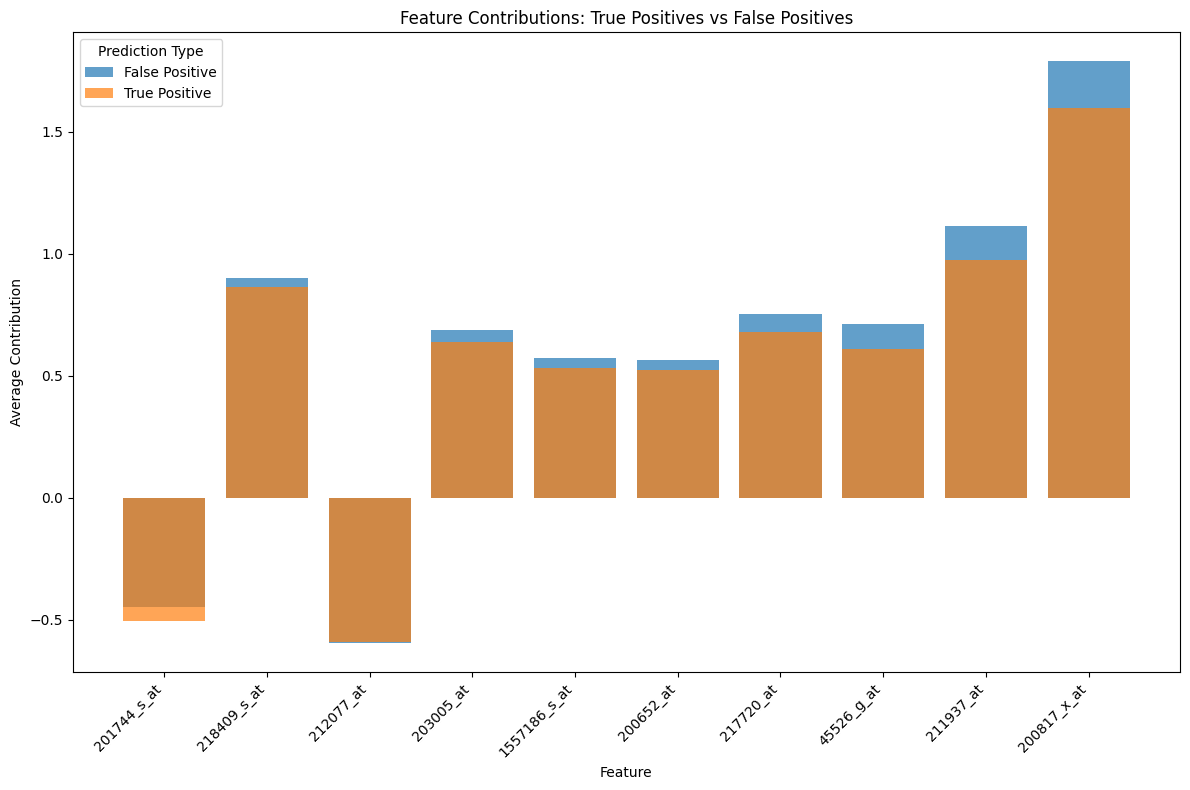

In [ ]:
# Visualize the difference between gene pattern of TP and FP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test dataset
y_pred = pipeline.predict(X_test)  # Predicted class (0 or 1)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability for class 1

# Extract coefficients and feature names
coefficients = pipeline.named_steps['classifier'].coef_[0]
feature_names = X.columns

# Identify TP and FP indices
TP_indices = np.where((y_test == 1) & (y_pred == 1))[0]  # True Positives
FP_indices = np.where((y_test == 0) & (y_pred == 1))[0]  # False Positives

# Function to calculate mean contributions
def calculate_mean_contributions(indices, X, coefficients, feature_names):
    contributions_list = []
    for i in indices:
        sample_features = X.iloc[i, :]  # Feature values for the sample
        contributions = sample_features.values * coefficients  # Feature contributions
        contributions_list.append(contributions)
    contributions_array = np.array(contributions_list)
    mean_contributions = contributions_array.mean(axis=0)  # Average contributions
    return pd.DataFrame({'Feature': feature_names, 'Contribution': mean_contributions})

# Calculate average contributions for TP and FP
TP_contributions = calculate_mean_contributions(TP_indices, X_test, coefficients, feature_names)
FP_contributions = calculate_mean_contributions(FP_indices, X_test, coefficients, feature_names)

# Combine data for plotting
TP_contributions['Type'] = 'True Positive'
FP_contributions['Type'] = 'False Positive'
combined_contributions = pd.concat([TP_contributions, FP_contributions])

# Select top features by absolute contribution
top_features = combined_contributions.groupby('Feature')['Contribution'].apply(lambda x: x.abs().mean()).nlargest(10).index
plot_data = combined_contributions[combined_contributions['Feature'].isin(top_features)]

# Plot
plt.figure(figsize=(12, 8))
for label, group in plot_data.groupby('Type'):
    plt.bar(group['Feature'], group['Contribution'], label=label, alpha=0.7)

plt.title("Feature Contributions: True Positives vs False Positives")
plt.ylabel("Average Contribution")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Prediction Type")
plt.tight_layout()
plt.show()


In [17]:
# Save model

import joblib
joblib.dump(pipeline, 'bladder.joblib')

['bladder.joblib']